In [5]:
# Tenemos el Hamiltioniano para q_{1} y p_{1}. Utilizando la integración simpléctica podemos encontrar estos valores. 
# Al tenerlos, podemos usar las ecuaciones de mapa de Poincaré para encontrar q_{3} y p_{3}. 


#Definimos las variables


import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

epsilon = 1
tau = 0.1


def A(p1):
    return 0.5*p1**(2)

def Aprime(p1):
    return p1

def Uprime(q1, epsilon_):
    return (2*q1)/(epsilon_**(2) + 4*q1**(2))**(3/2)

def U(q1, epsilon_):
    return -1/(2 * np.sqrt(4*q1**(2)) + epsilon_**(2))


In [6]:
def gammaUA(qn_, pn_, tau_, epsilon_):
    qnnext = qn_ + tau* Aprime(pn_ - tau_* Uprime(qn_, epsilon_))
    pnnext = pn_ - tau_* Uprime(qn_, epsilon_)
    return qnnext, pnnext

f = open("DatosPosicionMomento1.dat", "w+")



q = np.linspace(0,100,200)
p = np.linspace(0,100,200)

for i in range(len(q)):
    ans = gammaUA(q[i], p[i], tau, epsilon)
    f.write(str(ans[0]) + " " + str(ans[1]) + "\n")
    

In [7]:
doc = "DatosPosicionMomento1.dat"

data = np.loadtxt(doc)

coord1 = data[:,0]
moment1 = data[:,1]


In [10]:
#Ahora resolvamos la eq. diferencial (10)

def pos3(p3_):
    return p3_

def mom3(q1_, q3_, e_):
    term1 = (q1_ - q3_)/((q1_ - q3_)**(2) + (e_**(2))/4 )**(3/2)
    term2 = (q1_ + q3_)/((q1_ + q3_)**(2) + (e_**(2))/4 )**(3/2)
    return term1 + term2

In [17]:
def GetRungePos(y,deltat):
    print('Resolviendo primera eq. acoplada')
    for i in range(1,Npoints):
        k1 = pos3(y[i-1])
        k2 = pos3(y[i-1] + 0.5*k1*deltat)
        k3 = pos3(y[i-1] + 0.5*k2*deltat)
        k4 = pos3(y[i-1] + k3*deltat)
        y[i] = y[i-1] + deltat*(k1 + 2.*k2 + 2.*k3+k4)/6. 
    
        
        
def GetRungeMom(y,deltat, e_):
    print('Resolviendo segunda eq. acoplada')
    for i in range(1,Npoints):
        k1 = mom3(coord1[i -1], y[i-1], e_)
        k2 = mom3(coord1[i -1], y[i-1] + 0.5*k1*deltat, e_)
        k3 = mom3(coord1[i -1], y[i-1] + 0.5*k2*deltat, e_)
        k4 = mom3(coord1[i -1], y[i-1] + k3*deltat, e_)
        y[i] = y[i-1] + deltat*(k1 + 2.*k2 + 2.*k3+k4)/6. 

In [29]:
#Discretizemos el tiempo

Tmin, Tmax, Npoints = 0.,100., 200
t = np.linspace(Tmin, Tmax, Npoints)
deltat = (Tmax-Tmin)/float(Npoints-1)

In [30]:
# Condiciones iniciales 

ypos = np.zeros(Npoints)
ypos[0] = 1.

ymom = np.zeros(Npoints)
ymom[0] = 1. 


In [31]:
GetRungePos(ypos,deltat)

Resolviendo primera eq. acoplada


In [34]:
epsilon = 3
GetRungeMom(ymom, deltat, epsilon)

Resolviendo segunda eq. acoplada


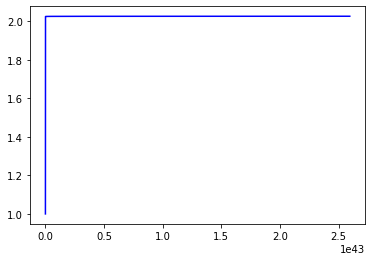

In [35]:
plt.plot(ypos,ymom, c='b',label='Rungek4')
plt.show()